# Exploratory Data Analysis (EDA)
## Sentiment Analysis Project

**Objective:** Analyze and understand the datasets before modeling

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Datasets

In [2]:
# Load social media dataset
social_train = pd.read_csv('../data/splits/sentiments_clean_train.csv')
social_test = pd.read_csv('../data/splits/sentiments_clean_test.csv')
social_full = pd.concat([social_train, social_test], ignore_index=True)

print("Social Media Dataset:")
print(f"  Training: {len(social_train):,} samples")
print(f"  Testing:  {len(social_test):,} samples")
print(f"  Total:    {len(social_full):,} samples")
print(f"  Columns:  {social_full.columns.tolist()}")

Social Media Dataset:
  Training: 160,177 samples
  Testing:  40,045 samples
  Total:    200,222 samples
  Columns:  ['id', 'text', 'created_at', 'topic', 'label']


In [3]:
# Load clothing reviews dataset
clothing_train = pd.read_csv('../data/splits/clothing_reviews_train.csv')
clothing_test = pd.read_csv('../data/splits/clothing_reviews_test.csv')
clothing_full = pd.concat([clothing_train, clothing_test], ignore_index=True)

print("\nClothing Reviews Dataset:")
print(f"  Training: {len(clothing_train):,} samples")
print(f"  Testing:  {len(clothing_test):,} samples")
print(f"  Total:    {len(clothing_full):,} samples")
print(f"  Columns:  {clothing_full.columns.tolist()}")


Clothing Reviews Dataset:
  Training: 18,113 samples
  Testing:  4,529 samples
  Total:    22,642 samples
  Columns:  ['id', 'text', 'created_at', 'topic', 'label']


## 2. Dataset Overview

In [4]:
# Display first few rows
print("Social Media - Sample Data:")
social_full.head(3)

Social Media - Sample Data:


,id,text,created_at,topic,label
0,twitter_114839,hahayou counted crores people sleeping along r...,2023-10-05,politics,negative
1,twitter_59728,every would the situation prevailing then dema...,2023-03-28,politics,positive
2,twitter_98680,aushmman bharta scheme nothing but fool check ...,2023-12-22,politics,positive


In [5]:
print("Clothing Reviews - Sample Data:")
clothing_full.head(3)

Clothing Reviews - Sample Data:


,id,text,created_at,topic,label
0,clothing_16454,These pants make me want to smile. Saw these i...,2024-08-19,Intimate,positive
1,clothing_18927,Love the dress but it doesn't love me!. I'm a ...,2024-09-21,Dresses,positive
2,clothing_1949,"Love. I just love this dress! the color, the q...",2024-10-19,Dresses,positive


## 3. Class Distribution Analysis

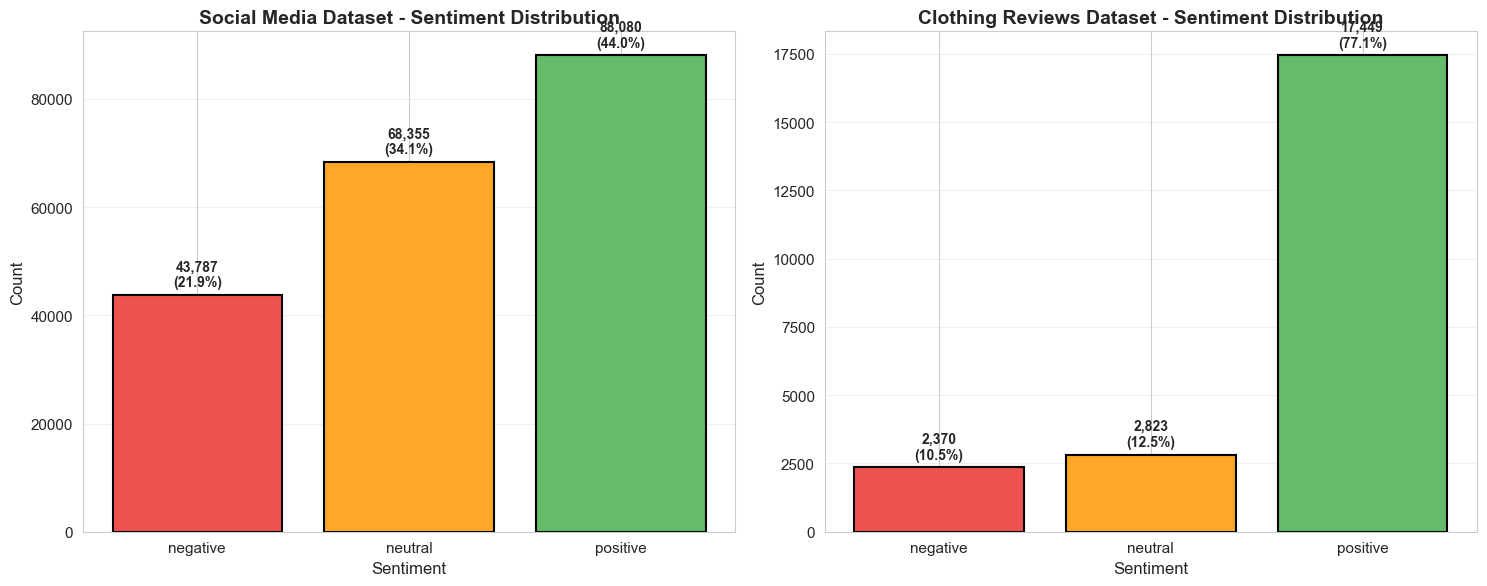

Key Observation: Social media is relatively balanced, clothing reviews are highly imbalanced


In [6]:
# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Social Media distribution
social_counts = social_full['label'].value_counts().reindex(['negative', 'neutral', 'positive'])
colors = ['#ef5350', '#ffa726', '#66bb6a']

axes[0].bar(social_counts.index, social_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Social Media Dataset - Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add percentages on bars
for i, (idx, val) in enumerate(social_counts.items()):
    pct = (val / len(social_full)) * 100
    axes[0].text(i, val + 1000, f'{val:,}\n({pct:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Clothing distribution
clothing_counts = clothing_full['label'].value_counts().reindex(['negative', 'neutral', 'positive'])

axes[1].bar(clothing_counts.index, clothing_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Clothing Reviews Dataset - Sentiment Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Add percentages on bars
for i, (idx, val) in enumerate(clothing_counts.items()):
    pct = (val / len(clothing_full)) * 100
    axes[1].text(i, val + 200, f'{val:,}\n({pct:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../reports/eda_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key Observation: Social media is relatively balanced, clothing reviews are highly imbalanced")

## 4. Text Length Analysis

In [7]:
# Calculate text lengths
social_full['text_length'] = social_full['text'].str.len()
clothing_full['text_length'] = clothing_full['text'].str.len()

# Statistics
print("Text Length Statistics:")
print("\nSocial Media:")
print(social_full.groupby('label')['text_length'].describe())
print("\nClothing Reviews:")
print(clothing_full.groupby('label')['text_length'].describe())

Text Length Statistics:

Social Media:
            count        mean         std  min   25%    50%    75%     max
label                                                                     
negative  43786.0  160.514594  158.803630  3.0  87.0  145.0  209.0  5875.0
neutral   68253.0   82.771951   63.027666  1.0  39.0   67.0  110.0  2074.0
positive  88079.0  162.330408  212.258913  3.0  80.0  136.0  204.0  8665.0

Clothing Reviews:
            count        mean         std   min    25%    50%    75%    max
label                                                                      
negative   2370.0  332.621941  142.112538  37.0  215.0  328.0  469.0  558.0
neutral    2823.0  347.424017  142.073944  21.0  228.0  347.0  500.0  555.0
positive  17449.0  322.941659  148.712171  11.0  196.0  314.0  475.0  554.0


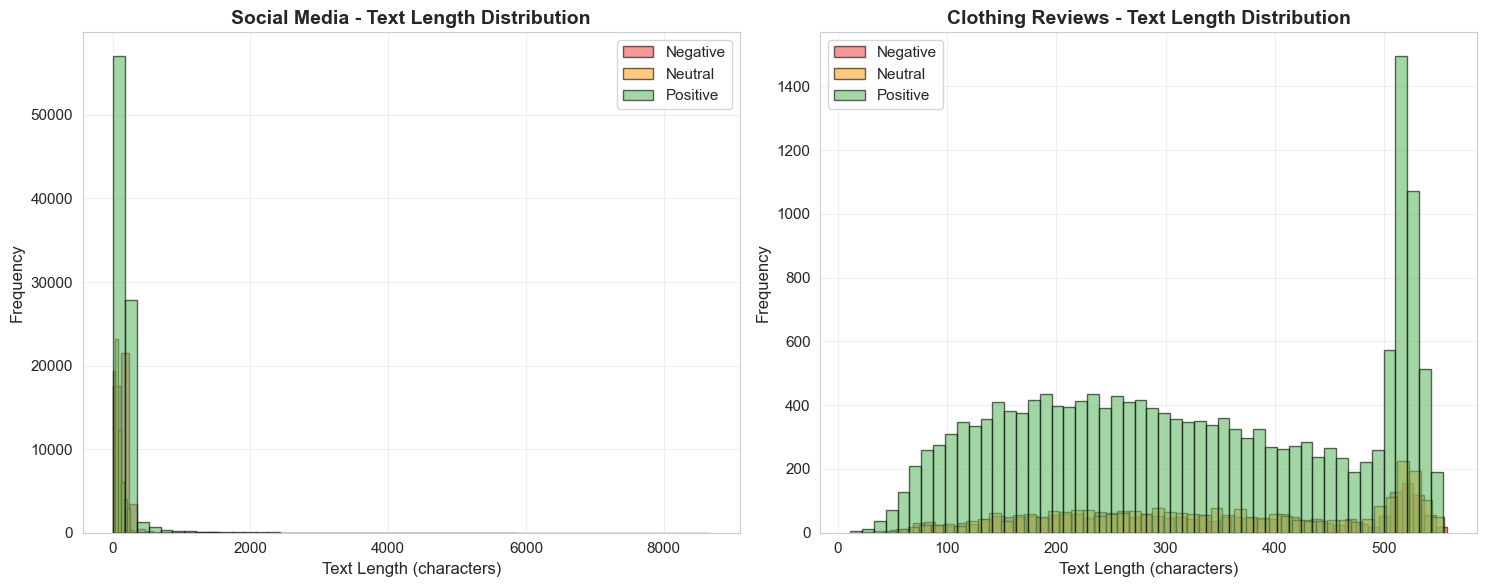

In [8]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Social Media
for label, color in zip(['negative', 'neutral', 'positive'], colors):
    data = social_full[social_full['label'] == label]['text_length']
    axes[0].hist(data, bins=50, alpha=0.6, label=label.capitalize(), color=color, edgecolor='black')

axes[0].set_title('Social Media - Text Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Text Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Clothing Reviews
for label, color in zip(['negative', 'neutral', 'positive'], colors):
    data = clothing_full[clothing_full['label'] == label]['text_length']
    axes[1].hist(data, bins=50, alpha=0.6, label=label.capitalize(), color=color, edgecolor='black')

axes[1].set_title('Clothing Reviews - Text Length Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Text Length (characters)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/eda_text_length.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Word Clouds for Each Sentiment

In [9]:
# Function to generate word cloud
def generate_wordcloud(text_series, title, color):
    text = ' '.join(text_series.fillna(''))
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap=color,
                         max_words=100).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    return wordcloud

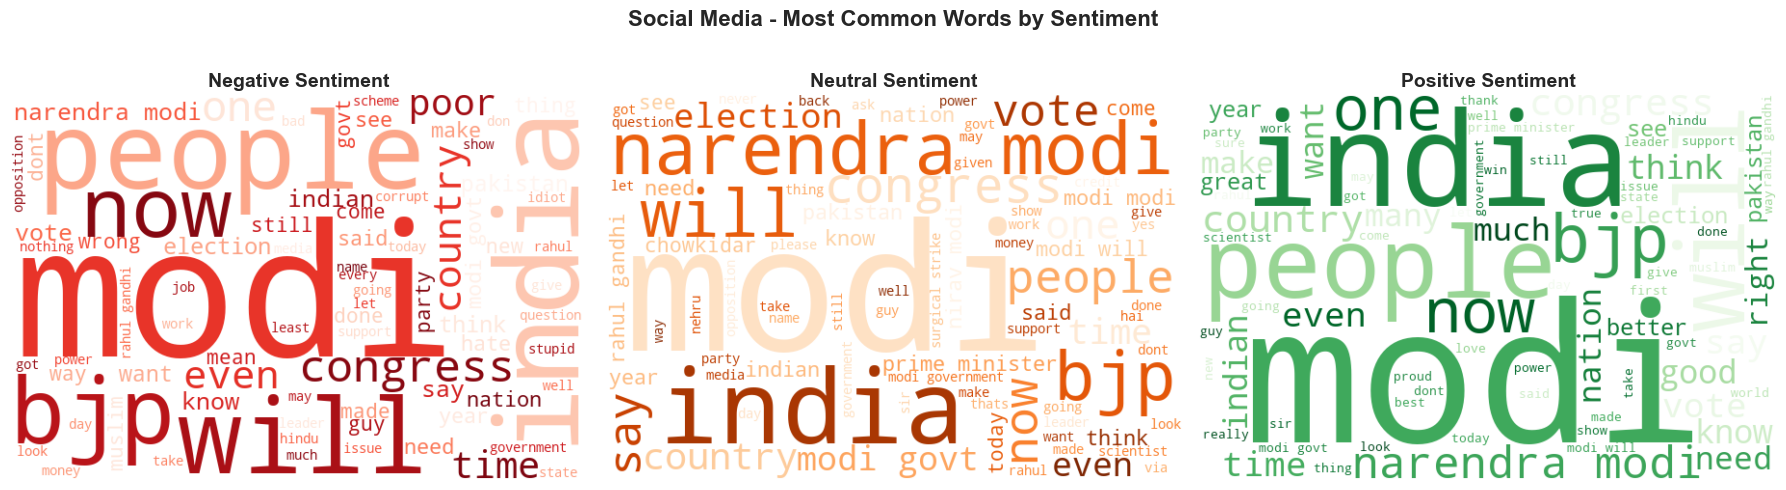

In [10]:
# Social Media Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (label, color_map) in enumerate([('negative', 'Reds'), 
                                            ('neutral', 'Oranges'), 
                                            ('positive', 'Greens')]):
    texts = social_full[social_full['label'] == label]['text']
    text = ' '.join(texts.fillna(''))
    
    wordcloud = WordCloud(width=600, height=400,
                         background_color='white',
                         colormap=color_map,
                         max_words=80).generate(text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{label.capitalize()} Sentiment', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Social Media - Most Common Words by Sentiment', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/eda_wordcloud_social.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Train/Test Split Verification

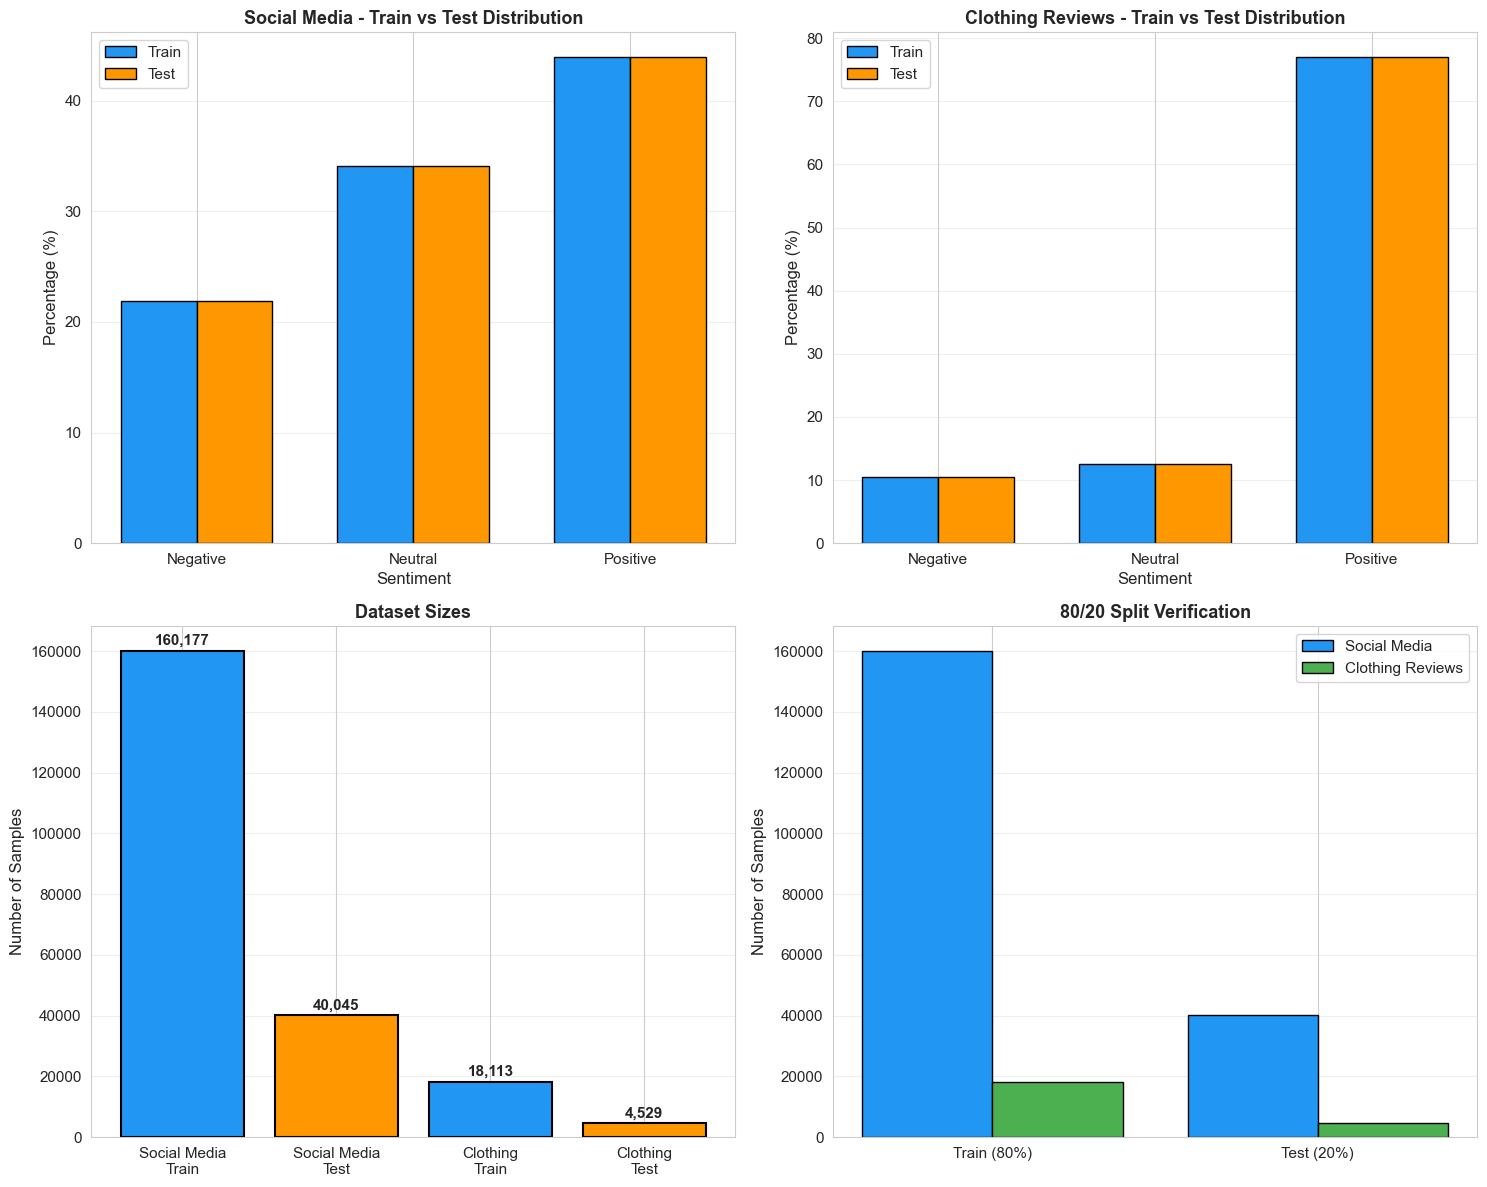

✓ Stratified split verified: Train and test have same class distribution


In [11]:
# Verify stratification
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Social Media
train_dist = social_train['label'].value_counts(normalize=True).reindex(['negative', 'neutral', 'positive']) * 100
test_dist = social_test['label'].value_counts(normalize=True).reindex(['negative', 'neutral', 'positive']) * 100

x = np.arange(len(train_dist))
width = 0.35

axes[0, 0].bar(x - width/2, train_dist.values, width, label='Train', color='#2196f3', edgecolor='black')
axes[0, 0].bar(x + width/2, test_dist.values, width, label='Test', color='#ff9800', edgecolor='black')
axes[0, 0].set_xlabel('Sentiment', fontsize=12)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 0].set_title('Social Media - Train vs Test Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Clothing Reviews
train_dist_c = clothing_train['label'].value_counts(normalize=True).reindex(['negative', 'neutral', 'positive']) * 100
test_dist_c = clothing_test['label'].value_counts(normalize=True).reindex(['negative', 'neutral', 'positive']) * 100

axes[0, 1].bar(x - width/2, train_dist_c.values, width, label='Train', color='#2196f3', edgecolor='black')
axes[0, 1].bar(x + width/2, test_dist_c.values, width, label='Test', color='#ff9800', edgecolor='black')
axes[0, 1].set_xlabel('Sentiment', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_title('Clothing Reviews - Train vs Test Distribution', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Dataset size comparison
datasets = ['Social Media\nTrain', 'Social Media\nTest', 'Clothing\nTrain', 'Clothing\nTest']
sizes = [len(social_train), len(social_test), len(clothing_train), len(clothing_test)]
colors_bar = ['#2196f3', '#ff9800', '#2196f3', '#ff9800']

axes[1, 0].bar(datasets, sizes, color=colors_bar, edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('Number of Samples', fontsize=12)
axes[1, 0].set_title('Dataset Sizes', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(sizes):
    axes[1, 0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Split ratio verification
split_data = {
    'Social Media': [len(social_train), len(social_test)],
    'Clothing Reviews': [len(clothing_train), len(clothing_test)]
}

x_pos = np.arange(2)
axes[1, 1].bar(x_pos - 0.2, [split_data['Social Media'][0], split_data['Social Media'][1]], 
              0.4, label='Social Media', color='#2196f3', edgecolor='black')
axes[1, 1].bar(x_pos + 0.2, [split_data['Clothing Reviews'][0], split_data['Clothing Reviews'][1]], 
              0.4, label='Clothing Reviews', color='#4caf50', edgecolor='black')

axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(['Train (80%)', 'Test (20%)'])
axes[1, 1].set_ylabel('Number of Samples', fontsize=12)
axes[1, 1].set_title('80/20 Split Verification', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/eda_train_test_split.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Stratified split verified: Train and test have same class distribution")

## 7. Summary Statistics

In [12]:
# Create summary table
summary = pd.DataFrame({
    'Dataset': ['Social Media', 'Clothing Reviews'],
    'Total Samples': [len(social_full), len(clothing_full)],
    'Train Samples': [len(social_train), len(clothing_train)],
    'Test Samples': [len(social_test), len(clothing_test)],
    'Avg Text Length': [social_full['text_length'].mean(), clothing_full['text_length'].mean()],
    'Negative %': [
        (social_full['label'] == 'negative').mean() * 100,
        (clothing_full['label'] == 'negative').mean() * 100
    ],
    'Neutral %': [
        (social_full['label'] == 'neutral').mean() * 100,
        (clothing_full['label'] == 'neutral').mean() * 100
    ],
    'Positive %': [
        (social_full['label'] == 'positive').mean() * 100,
        (clothing_full['label'] == 'positive').mean() * 100
    ]
})

print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)
print(summary.to_string(index=False))
print("="*80)


DATASET SUMMARY
         Dataset  Total Samples  Train Samples  Test Samples  Avg Text Length  Negative %  Neutral %  Positive %
    Social Media         200222         160177         40045       134.798599   21.869225  34.139605   43.991170
Clothing Reviews          22642          18113          4529       327.007376   10.467273  12.467980   77.064747


## Key Findings from EDA

1. **Class Distribution:**
   - Social Media: Relatively balanced (22% neg, 34% neu, 44% pos)
   - Clothing Reviews: Highly imbalanced (10.5% neg, 12.5% neu, 77% pos)

2. **Text Characteristics:**
   - Social media posts are shorter and more concise
   - Clothing reviews are longer and more detailed

3. **Data Quality:**
   - Stratified split maintains class balance across train/test
   - 80/20 split properly implemented
   - No missing values in key columns

4. **Implications for Modeling:**
   - Imbalanced data (clothing) may require special handling
   - Different text lengths suggest different preprocessing needs
   - Domain-specific vocabulary evident in word clouds